In [2]:
from collections import Counter
import math, random

Utilizaremos un datframe recabado de una pulsera fitbit para ver como esta funcionando el ciclo de sueño del usuario que los registro

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('./recursos/sleepDay_merged.csv')
print(df)


             Id    SleepDay      Time  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  12/04/2016  00:00:00                  1                 327   
1    1503960366  13/04/2016  12:00:00                  2                 384   
2    1503960366  15/04/2016  12:00:00                  1                 412   
3    1503960366  16/04/2016  12:00:00                  2                 340   
4    1503960366  17/04/2016  12:00:00                  1                 700   
..          ...         ...       ...                ...                 ...   
408  8792009665  30/04/2016  12:00:00                  1                 343   
409  8792009665  01/05/2016  00:00:00                  1                 503   
410  8792009665  02/05/2016  00:00:00                  1                 415   
411  8792009665  03/05/2016  00:00:00                  1                 516   
412  8792009665  04/05/2016  00:00:00                  1                 439   

     TotalTimeInBed  
0               3

In [4]:
#Obtenemos el largo de el dataframe
print(len(df))

413


In [5]:
#Vemos que fraccion vamos a utilizar del df para entrenamiento
a = random.uniform(0.5, 1)
print(a)

0.6007912732237546


In [6]:
def split_data(data, prob):
    prob = (int(prob*10))/10
    #print(prob)
    colamayor = int(len(data)*prob)
    colamenor = int(len(data)-len(data)*prob)
    
    dfs = np.array_split(data, [colamayor,colamenor+colamayor] , axis=0)


    return dfs

In [7]:
x = split_data(df, a)
print(x)

[             Id    SleepDay      Time  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  12/04/2016  00:00:00                  1                 327   
1    1503960366  13/04/2016  12:00:00                  2                 384   
2    1503960366  15/04/2016  12:00:00                  1                 412   
3    1503960366  16/04/2016  12:00:00                  2                 340   
4    1503960366  17/04/2016  12:00:00                  1                 700   
..          ...         ...       ...                ...                 ...   
242  5553957443  26/04/2016  12:00:00                  1                 412   
243  5553957443  27/04/2016  12:00:00                  1                 347   
244  5553957443  28/04/2016  12:00:00                  1                 421   
245  5553957443  29/04/2016  12:00:00                  1                 450   
246  5553957443  30/04/2016  12:00:00                  2                 775   

     TotalTimeInBed  
0               

In [8]:
TiempoDormido = df[:100][['TotalMinutesAsleep', 'TotalTimeInBed']]

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

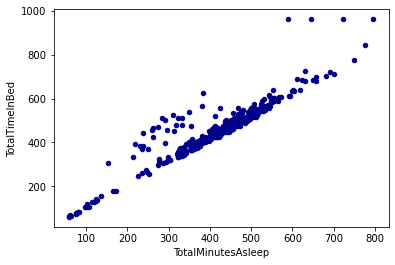

In [9]:
df.plot.scatter(x='TotalMinutesAsleep',
                       y='TotalTimeInBed',
                       c='DarkBlue')



In [10]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(TiempoDormido)

In [11]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.01010101 0.89601751]
 [0.89601751 1.01010101]]


In [12]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.1140835  1.90611852]


In [13]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
1.9061185183988223
0.11408350180319793


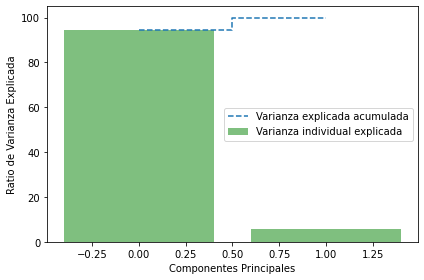

In [14]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada

plt.figure(figsize=(6, 4))

plt.bar(range(2), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
plt.step(range(2), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(2,1),
                      eig_pairs[1][1].reshape(2,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [16]:
type(Y)

numpy.ndarray

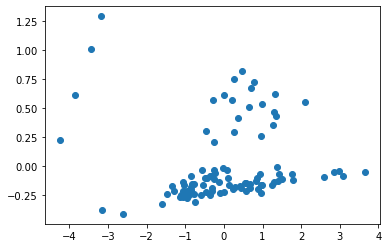

In [17]:
plt.scatter(Y[:,0], Y[:,1])

In [18]:
TiempoDormido[:2:]

,TotalMinutesAsleep,TotalTimeInBed
0,327,346
1,384,407


In [19]:
def train_test_split(x, y, test_pct):
    data = list(zip(x, y))                        # pair corresponding values
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = list(zip(*train))          # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

In [20]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)

    return 2 * p * r / (p + r)

if __name__ == "__main__":

    print("accuracy(70, 4930, 13930, 981070)", accuracy(70, 4930, 13930, 981070))
    print("precision(70, 4930, 13930, 981070)", precision(70, 4930, 13930, 981070))
    print("recall(70, 4930, 13930, 981070)", recall(70, 4930, 13930, 981070))
    print("f1_score(70, 4930, 13930, 981070)", f1_score(70, 4930, 13930, 981070))

accuracy(70, 4930, 13930, 981070) 0.98114
precision(70, 4930, 13930, 981070) 0.014
recall(70, 4930, 13930, 981070) 0.005
f1_score(70, 4930, 13930, 981070) 0.00736842105263158


Aproximadamente 5 de cada 1,000 bebes son llamados Luke , Y la prevalencia que exista una condicion de leucemia es de 1.4% o 14 de cada 1000 neonatos

|  | Leucemia |No Leucemia | Total |
| ----------- | ----------- |----------- |----------- |
| Paciente | 70 | 4930 | 5000 |
| Otros Pacientes | 13930 | 981070 | 995000 |
| Total | 14000 | 986000 | 1000000 |

In [21]:
#Fraccion de predicciones correctas
print(accuracy(70,4930,13930,981070))

0.98114


La precision mide como de acertado es positiva nuestra prediccion

In [22]:
print(precision(70,4930,13930,981070))

0.014


Y recall mide cual fraccion de nuestros positivos es identificado por el modelo

In [23]:
print(recall(70,4930,13930,981070))

0.005


Estos son numeros terribles , reflejando que es un modelo terrible

In [24]:
f1_score(70,4930,13930,981070)

0.00736842105263158

In [25]:
from collections import Counter
from linear_algebra import distance
from stats import mean
import math, random
import matplotlib.pyplot as plt

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [26]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


In [27]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)


cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [28]:
#pip install plotly-express

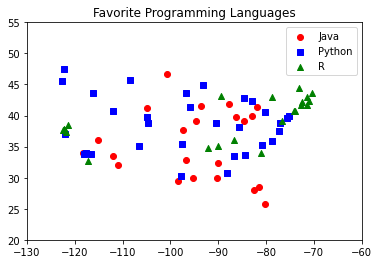

In [29]:


    # key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],label=language, zorder=10)

    #plot_state_borders(plt)    # assume we have a function that does this


plt.legend(loc=0)          # let matplotlib choose the location
plt.axis([-130,-60,20,55]) # set the axes
plt.title("Favorite Programming Languages")
plt.show()


In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt


#terminar el mapita

In [53]:

cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [(longitude, latitude, language) for longitude, latitude, language in cities]


dfCities = pd.DataFrame(cities, columns =['Coordenadasx','Coordenadasy','Lenguaje'])
dfCities

,Coordenadasx,Coordenadasy,Lenguaje
0,-86.750000,33.566667,Python
1,-88.250000,30.683333,Python
2,-112.016667,33.433333,Java
3,-110.933333,32.116667,Java
4,-92.233333,34.733333,R
...,...,...,...
70,-73.150000,44.466667,R
71,-77.333333,37.500000,Python
72,-122.300000,47.533333,Python
73,-89.333333,43.133333,R


In [55]:
BBox = ((dfCities.Coordenadasx.min(),   dfCities.Coordenadasy.max(),      
         dfCities.Coordenadasx.min(), dfCities.Coordenadasy.max()))


Text(0.5, 1.0, 'Plotting Spatial Data on Riyadh Map')

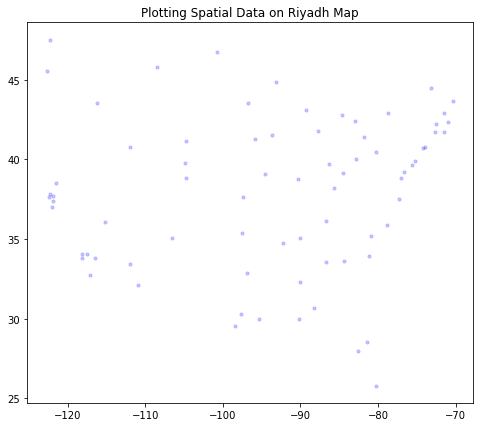

In [61]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dfCities.Coordenadasx, dfCities.Coordenadasy, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')



In [ ]:
image.png